In [3]:
import random
import numpy as np 
import sys

m = 50

n = 50

w0 = 5

w1 = 2

w2 = 3

positives = []

neigitivs = []

fo1 = open('Dataset.txt','w')

for i in range(m):
    while True:
        x1 = np.random.uniform(-1000,1000,500)
        x2 = np.random.uniform(-1000,1000,500)
        if x1[i] * w1 + x2[i] * w2 + w0 > 0:
            positives.append('{},{},{}'.format(x1[i],x2[i],"+"))
            print(x1[i],x2[i],'+')
            break

for j in range(n):
    while True:
        x1 = np.random.uniform(-1000,1000,500)
        x2 = np.random.uniform(-1000,1000,500)
        if x1[j] * w1 + x2[j] * w2 + w0 < 0:
            neigitivs.append('{},{},{}'.format(x1[j],x2[j],"-"))
            print(x1[j],x2[j],'-')
            break
                    
total = neigitivs + positives

random.shuffle(total)

for i in range(len(total)):
    fo1.write(total[i]+'\n')
    
fo1.close()

286.3981922070625 902.343752147483 +
-785.59218009867 644.5310519576226 +
985.2357240983451 906.004671613754 +
923.1781834245526 334.27240112691743 +
760.9626322014497 743.8442154395161 +
539.7379181958995 -9.034523987628631 +
191.7445184419771 793.1773856294417 +
248.56346465270235 361.58228452084063 +
962.0879529471938 802.8166799309695 +
-999.7624657978223 668.787609528029 +
985.8201012394763 881.730209785044 +
464.5515643319809 689.0568569820514 +
-486.2262890884266 549.5277608575218 +
232.61239591112485 440.26936877506773 +
-0.8991806881007278 399.1670562661077 +
-666.7720605656409 562.4285115444497 +
-32.73791301686208 491.97450339102124 +
-243.55840126407566 301.8060742626715 +
722.2157727498143 -440.2005922586585 +
-263.4240367210325 919.3938905330551 +
-389.21471482239144 889.1498473881638 +
217.9033089928721 367.34201922717216 +
289.06540469660104 465.83325851939117 +
270.3749793740117 317.52942907909414 +
711.6802667052862 345.4888406613993 +
362.3888937283896 -57.9643413157

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import copy

data_set = []
data_label = []
data_back = []
data_reback1 = []
data_reback2 = []

file = open('Dataset.txt','r')

for line in file:
    line=line.rstrip("\n")
    line1 = line.split(',')
    data_back.append(line1)
file.close()

for i in range(len(data_back)):
    if data_back[i][-1] == '+':
        data_reback1.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'1'))
    else:
        data_reback2.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'-1'))

data_reback = data_reback1+data_reback2

fo1 = open('3.txt','w')

for i in range(len(data_reback)):
    
    fo1.write(data_reback[i]+'\n')  
    
fo1.close()

training_data = open('3.txt','r')

training_set = []

for line in training_data:
    line=line.rstrip("\n")
    line1 = line.split(',')
    for i in range(len(line1)):
        line1[i] = float(line1[i])
    data_set.append(line1[0:2])
    data_label.append(int(line1[-1]))

for j in range(len(data_set)):
    for j in range(len(data_label)):
        training_set.append([tuple(data_set[j]),data_label[j]])

w = [0, 0]  # 参数初始化
b = 0
history = []  # 用来记录每次更新过后的w,b



def update(item):
    """
    随机梯度下降更新参数
    :param item: 参数是分类错误的点
    :return: nothing 无返回值
    """
    global w, b, history  # 把w, b, history声明为全局变量
    w[0] += 1 * item[1] * item[0][0]  # 根据误分类点更新参数,这里学习效率设为1
    w[1] += 1 * item[1] * item[0][1]
    b += 1 * item[1]
    history.append([copy.copy(w), b])  # 将每次更新过后的w,b记录在history数组中
    
def cal(item):
    """
    计算item到超平面的距离,输出yi(w*xi+b)
    （我们要根据这个结果来判断一个点是否被分类错了。如果yi(w*xi+b)>0,则分类错了）
    :param item:
    :return:
    """
    res = 0
    for i in range(len(item[0])):  # 迭代item的每个坐标，对于本文数据则有两个坐标x1和x2
        res += item[0][i] * w[i]
    res += b
    res *= item[1]  # 这里是乘以公式中的yi
    return res


def check():
    """
    检查超平面是否已将样本正确分类
    :return: true如果已正确分类则返回True
    """
    flag = False
    for item in training_set:
        if cal(item) <= 0:  # 如果有分类错误的
            flag = True  # 将flag设为True
            update(item)  # 用误分类点更新参数
    if not flag:  # 如果没有分类错误的点了
        print("最终结果: w: " + str(w) + "b: " + str(b))  # 输出达到正确结果时参数的值
    return flag  # 如果已正确分类则返回True,否则返回False


if __name__ == "__main__":
    for i in range(1000):  # 迭代1000遍
        if not check(): 
            break  # 如果已正确分类，则结束迭代
    # 以下代码是将迭代过程可视化
    # 首先建立我们想要做成动画的图像figure, 坐标轴axis,和plot element
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
    line, = ax.plot([], [], 'g', lw=2)  # 画一条线
    label = ax.text([], [], '')


    def init():
        line.set_data([], [])
        x, y, x_, y_ = [], [], [], []
        for p in training_set:
            if p[1] > 0:
                x.append(p[0][0])  # 存放yi=1的点的x1坐标
                y.append(p[0][1])  # 存放yi=1的点的x2坐标
            else:
                x_.append(p[0][0])  # 存放yi=-1的点的x1坐标
                y_.append(p[0][1])  # 存放yi=-1的点的x2坐标
        plt.plot(x, y, 'bo', x_, y_, 'rx')  # 在图里yi=1的点用点表示，yi=-1的点用叉表示
        plt.axis([-6, 6, -6, 6])  # 横纵坐标上下限
        plt.grid(True)  # 显示网格
        plt.xlabel('x1')  # 这里我修改了原文表示
        plt.ylabel('x2')  # 为了和原理中表达方式一致，横纵坐标应该是x1,x2
        plt.title('Perceptron Algorithm (www.hankcs.com)')  # 给图一个标题：感知机算法
        return line, label

    def animate(i):
        global history, ax, line, label
        w = history[i][0]
        b = history[i][1]
        if w[1] == 0: 
            return line, label
        # 因为图中坐标上下限为-6~6，所以我们在横坐标为-7和7的两个点之间画一条线就够了，这里代码中的xi,yi其实是原理中的x1,x2
        x1 = -7
        y1 = -(b + w[0] * x1) / w[1]
        x2 = 7
        y2 = -(b + w[0] * x2) / w[1]
        line.set_data([x1, x2], [y1, y2])  # 设置线的两个点
        x1 = 0
        y1 = -(b + w[0] * x1) / w[1]
        label.set_text(history[i])
        label.set_position([x1, y1])
        return line, label


    print("参数w,b更新过程：", history)
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(history), interval=1000, repeat=True,
                                   blit=True)
    plt.show()



最终结果: w: [2812.7474191902293, 4106.555190239278]b: -26
参数w,b更新过程： [[[929.1835998673037, -494.7862308773634], 1], [[314.208652679989, 241.4048567992067], 2], [[-438.40657956429527, 1129.2948868568599], 3], [[560.4873092126204, 473.3533422160151], 2], [[180.54054063622084, 899.1915797053574], 1], [[1109.7241405035245, 404.40534882799403], 2], [[494.7491933162098, 1140.596436504564], 3], [[1493.6430820931255, 484.6548918637193], 2], [[1113.696313516726, 910.4931293530616], 1], [[327.4906737102583, 1453.1947214630218], 0], [[1256.674273577562, 958.4084905856585], 1], [[641.6993263902473, 1694.5995782622285], 2], [[1640.593215167163, 1038.6580336213838], 1], [[1260.6464465907634, 1464.496271110726], 0], [[474.4408067842958, 2007.197863220686], -1], [[1403.6244066515994, 1512.4116323433227], 0], [[617.4187668451318, 2055.113224453283], -1], [[1546.6023667124355, 1560.3269935759195], 0], [[760.3967269059679, 2103.0285856858795], -1], [[1689.5803267732715, 1608.2423548085162], 0], [[990.166202

TypeError: float() argument must be a string or a number, not 'list'

<Figure size 432x288 with 1 Axes>

['-490.5563312806267', '969.0715198597654', '1']
[[-490.5563312806267, 969.0715198597654]]
['-217.19285620216363', '334.3906316267892', '1']
[[-490.5563312806267, 969.0715198597654], [-217.19285620216363, 334.3906316267892]]
['-111.46361912559314', '356.982941865524', '1']
[[-490.5563312806267, 969.0715198597654], [-217.19285620216363, 334.3906316267892], [-111.46361912559314, 356.982941865524]]
['-666.7720605656409', '562.4285115444497', '1']
[[-490.5563312806267, 969.0715198597654], [-217.19285620216363, 334.3906316267892], [-111.46361912559314, 356.982941865524], [-666.7720605656409, 562.4285115444497]]
['711.6802667052862', '345.4888406613993', '1']
[[-490.5563312806267, 969.0715198597654], [-217.19285620216363, 334.3906316267892], [-111.46361912559314, 356.982941865524], [-666.7720605656409, 562.4285115444497], [711.6802667052862, 345.4888406613993]]
['-499.72311788791467', '671.3194516813005', '1']
[[-490.5563312806267, 969.0715198597654], [-217.19285620216363, 334.3906316267892]

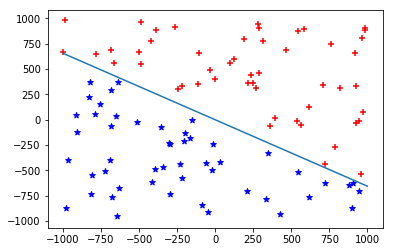

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
data_set = []
data_label = []

data_back = []

data_reback1 = []
data_reback2 = []

file = open('Dataset.txt','r')

for line in file:
    line=line.rstrip("\n")
    line1 = line.split(',')
    data_back.append(line1)
file.close()    
for i in range(len(data_back)):
    if data_back[i][-1] == '+':
        data_reback1.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'1'))
    else:
        data_reback2.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'-1'))

data_reback = data_reback1+data_reback2   

fo1 = open('3.txt','w')
for i in range(len(data_reback)):
    fo1.write(data_reback[i]+'\n')     
fo1.close()

file1 = open('3.txt','r')

for line in file1:
    line=line.rstrip("\n")
    line1 = line.split(',')
    print(line1)
    for i in range(len(line1)):
        line1[i] = float(line1[i])
    data_set.append(line1[0:2])
    print(data_set)
    data_label.append(int(line1[-1]))
file.close()
data = np.array(data_set)
label = np.array(data_label)
# 初始化w, b, alpha
w = np.array([0, 0])
b = 0
alpha = 1
# 计算 y*(w*x+b)
f = (np.dot(data, w.T) + b) * label
idx = np.where(f <= 0)
# 使用随机梯度下降法求解w, b
iteration = 1
while f[idx].size != 0:
    point = np.random.randint((f[idx].shape[0]))
    x = data[idx[0][point], :]
    y = label[idx[0][point]]
    w = w + alpha * y * x
    b = b + alpha * y
    print('Iteration:%d  w:%s  b:%s' % (iteration, w, b))
    f = (np.dot(data, w.T) + b) * label
    idx = np.where(f <= 0)
    iteration = iteration + 1
 
# 绘图显示
x1 = np.arange(-1000, 1000, 0.1)
x2 = (w[0] * x1 + b) / (-w[1])
idx_p = np.where(label == 1)
idx_n = np.where(label != 1)
data_p = data[idx_p]
data_n = data[idx_n]
plt.scatter(data_p[:, 0], data_p[:, 1], color='red',marker="+")
plt.scatter(data_n[:, 0], data_n[:, 1], color='blue',marker="*")
plt.plot(x1, x2)
plt.show()

####  数据的数量 会直接影响到最后得出 w0 w1 w2 的次数    数据量越大  计算次数越多